Importing the required Libraries.

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

Path of data dataset to test and train the model

In [2]:
train_dir = "data-set/test" 
test_dir = "data-set/train"   

In [3]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

c:\Users\ANSHUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
img_size=48

In [5]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2  # Use validation split for train set
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use validation split for validation set
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"  # Specify subset for training data
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"  # Specify subset for validation data
)


Found 5746 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [6]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 5746 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [7]:
model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [8]:
epochs = 45
batch_size = 64

In [9]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

c:\Users\ANSHUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 851ms/step - accuracy: 0.1861 - loss: 2.4835 - val_accuracy: 0.2513 - val_loss: 2.3526
Epoch 2/45
90/90 ━━━━━━━━━━━━━━━━━━━━ 80s 890ms/step - accuracy: 0.2262 - loss: 2.0535 - val_accuracy: 0.2134 - val_loss: 1.9350
Epoch 3/45
90/90 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2287 - loss: 2.0031 - val_accuracy: 0.2547 - val_loss: 2.3016
Epoch 4/45
90/90 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.2561 - loss: 1.9211 - val_accuracy: 0.2513 - val_loss: 2.6634
Epoch 5/45
90/90 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.2608 - loss: 1.8630 - val_accuracy: 0.1690 - val_loss: 1.9397
Epoch 6/45
90/90 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.2805 - loss: 1.8333 - val_accuracy: 0.1702 - val_loss: 2.1541
Epoch 7/45
90/90 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3254 - loss: 1.7338 - val_accuracy: 0.3264 - val_loss: 1.7438
Epoch 8/45
90/90 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.3534 - loss: 1.6788 - val_accuracy: 0.3181 

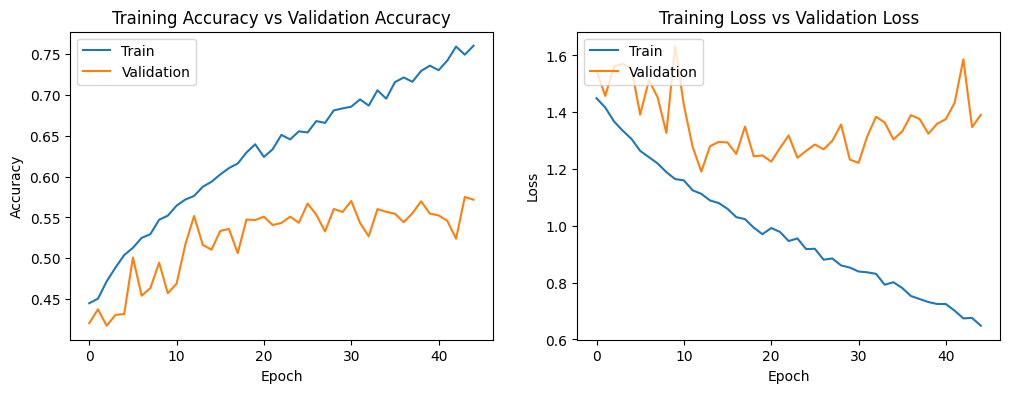

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [10]:
model.save('model_FER.h5')  # This saves the model architecture and weights



In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import load_model

# Define the model architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))  # 7 classes for the emotions




In [12]:
# Load the weights into the model
from keras.models import load_model

model = load_model('model_FER.h5')  # This loads both the architecture and weights


In [13]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

# Load the pre-trained model
model = load_model('model_FER.h5')

# Emotion classes (these are the labels from FER-2013)
emotion_classes = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

# Initialize the webcam
cap = cv2.VideoCapture(0)  # 0 is the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale (model works with grayscale images)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Load a pre-trained face detector (Haar Cascade for face detection)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face from the frame
        face = gray_frame[y:y+h, x:x+w]

        # Resize the face to 48x48 pixels (required by the model)
        face = cv2.resize(face, (48, 48))

        # Normalize the image (required by the model)
        face = face.astype('float32') / 255

        # Reshape for model input (add batch dimension)
        face = np.expand_dims(face, axis=-1)  # Add channel dimension
        face = np.expand_dims(face, axis=0)   # Add batch dimension

        # Make prediction
        prediction = model.predict(face)

        # Get the predicted emotion class
        predicted_class = emotion_classes[np.argmax(prediction)]

        # Draw rectangle around the face and display the emotion
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, predicted_class, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Recognition', frame)

    # Break the loop if the user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━

KeyboardInterrupt: 

If found useful,Please Upvote!!